In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

data = pd.read_csv("data/sp500_2015_2024_clean.csv",
                   parse_dates=["Date"], index_col="Date")
print(data.head())
print(data.shape)


                  Close         High          Low         Open      Volume  \
Date                                                                         
2015-03-16  2081.189941  2081.409912  2055.350098  2055.350098  3295600000   
2015-03-17  2074.280029  2080.590088  2065.080078  2080.590088  3221840000   
2015-03-18  2099.500000  2106.850098  2061.229980  2072.840088  4128210000   
2015-03-19  2089.270020  2098.689941  2085.560059  2098.689941  3305220000   
2015-03-20  2108.100098  2113.919922  2090.320068  2090.320068  5554120000   

             Returns         MA20         MA50  
Date                                            
2015-03-16  0.013534  2091.118988  2059.713201  
2015-03-17 -0.003320  2089.815985  2060.034802  
2015-03-18  0.012158  2089.806989  2061.613203  
2015-03-19 -0.004873  2089.397992  2063.346404  
2015-03-20  0.009013  2089.287994  2064.990405  
(2466, 8)


In [15]:
data["Close_lag1"]=data["Close"].shift(1)
data["Close_lag5"]=data["Close"].shift(5)

data["Close_tomorrow"]=data["Close"].shift(-1)
data=data.dropna()

In [16]:
data

,Close,High,Low,Open,Volume,Returns,MA20,MA50,Close_lag1,Close_lag5,Close_tomorrow
Date,,,,,,,,,,,
2015-03-23,2104.419922,2114.860107,2104.419922,2107.989990,3267960000,-0.001746,2089.025995,2065.836006,2108.100098,2081.189941,2091.500000
2015-03-24,2091.500000,2107.629883,2091.500000,2103.939941,3189820000,-0.006139,2087.826996,2066.769805,2104.419922,2074.280029,2061.050049
2015-03-25,2061.050049,2097.429932,2061.050049,2093.100098,3521140000,-0.014559,2085.186493,2067.425605,2091.500000,2099.500000,2056.149902
2015-03-26,2056.149902,2067.149902,2045.500000,2059.939941,3510670000,-0.002377,2082.456989,2068.088003,2061.050049,2089.270020,2061.020020
2015-03-27,2061.020020,2062.830078,2052.959961,2055.780029,3008550000,0.002369,2080.282990,2069.083003,2056.149902,2108.100098,2086.239990
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,5930.850098,5982.060059,5832.299805,5842.000000,8223220000,0.010869,6021.371509,5927.023604,5867.080078,6051.089844,5974.069824
2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000,0.007287,6021.608008,5930.204404,5930.850098,6074.080078,6040.040039
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000,0.011043,6024.241504,5933.808203,5974.069824,6050.609863,6037.589844


In [17]:
feature_cols=["Close", "Returns", "MA20", "MA50", "Close_lag1", "Close_lag5", "Volume"]

X=data[feature_cols]
y=data["Close_tomorrow"]

In [18]:
split_ratio = 0.8
split_index = int(len(data) * split_ratio)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# RF_baseline

In [20]:
rf = RandomForestRegressor(n_estimators = 200, max_depth = 10, random_state = 42, n_jobs = -1) 

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [21]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE: ", rmse)

Test RMSE:  574.1626971415685


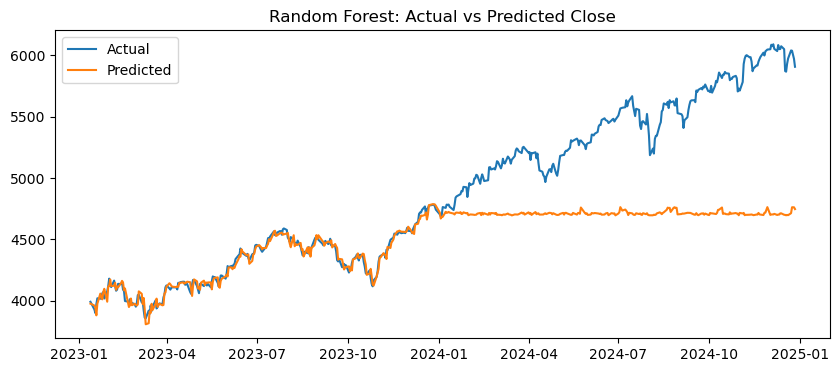

In [24]:
import matplotlib.pyplot as plt

test_dates = y_test.index

plt.figure(figsize=(10, 4))
plt.plot(test_dates, y_test, label = "Actual")
plt.plot(test_dates, y_pred, label = "Predicted")
plt.legend()
plt.title("Random Forest: Actual vs Predicted Close")
plt.show()

In [26]:
actual_dir = np.sign(y_test.values - X_test["Close"].values)
pred_dir = np.sign(y_pred - X_test["Close"].values)

direction_accuracy = (actual_dir == pred_dir).mean()
print("Direction accuracy: ", direction_accuracy)

Direction accuracy:  0.4898373983739837


In [42]:
data.drop('MA10', axis=1, inplace=True)
data.drop('Vol20', axis=1, inplace=True)
print(data)

                  Close         High          Low         Open      Volume  \
Date                                                                         
2016-10-14  2132.979980  2149.189941  2132.979980  2139.679932  3187910000   
2016-10-17  2126.500000  2135.610107  2124.429932  2132.949951  2832440000   
2016-10-18  2139.600098  2144.379883  2135.489990  2138.310059  3172940000   
2016-10-19  2144.290039  2148.439941  2138.149902  2140.810059  3364990000   
2016-10-20  2141.340088  2147.179932  2133.439941  2142.510010  3339320000   
...                 ...          ...          ...          ...         ...   
2024-12-20  5930.850098  5982.060059  5832.299805  5842.000000  8223220000   
2024-12-23  5974.069824  5978.250000  5902.569824  5940.250000  3593280000   
2024-12-24  6040.040039  6040.100098  5981.439941  5984.629883  1757720000   
2024-12-26  6037.589844  6049.750000  6007.370117  6024.970215  2904530000   
2024-12-27  5970.839844  6006.169922  5932.950195  6006.169922  

In [43]:
data["MA10"]=data["Close"].rolling(10).mean()
data["MA100"]=data["Close"].rolling(100).mean()
data["Vol20"]=data["Returns"].rolling(20).std()

data=data.dropna()
data.head()

,Close,High,Low,Open,Volume,Returns,MA20,MA50,Close_lag1,Close_lag5,Close_tomorrow,MA10,MA100,Vol20
Date,,,,,,,,,,,,,,
2017-03-09,2364.870117,2369.080078,2354.540039,2363.489990,3718450000,0.000800,2358.136011,2308.201196,2362.979980,2381.919922,2372.600098,2373.328003,2246.924692,0.004391
2017-03-10,2372.600098,2376.860107,2363.040039,2372.520020,3434400000,0.003269,2361.372510,2310.275601,2364.870117,2383.120117,2373.469971,2373.854004,2249.320894,0.004299
2017-03-13,2373.469971,2374.419922,2368.520020,2371.560059,3166650000,0.000367,2364.241003,2312.746602,2372.600098,2375.310059,2365.449951,2374.226001,2251.790593,0.004273
2017-03-14,2365.449951,2368.550049,2358.179932,2368.550049,3173760000,-0.003379,2366.101001,2315.070400,2373.469971,2368.389893,2385.260010,2374.407007,2254.049092,0.004282
2017-03-15,2385.260010,2390.010010,2368.939941,2370.340088,3909490000,0.008375,2368.484998,2317.998999,2365.449951,2362.979980,2381.379883,2373.337012,2256.458792,0.004557


In [44]:
data.to_csv("data/sp500_2015_2024_clean_tuning.csv")